In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/watson_healthcare_CIA.csv")

In [4]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80.0,0.0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80.0,1.0,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,54.0,0.0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,56.0,0.0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80.0,1.0,6,3,3,2,2,2,2


In [5]:
data.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1642.000000,1667.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,76.984166,0.810438,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,7.318038,0.855776,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,50.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.000000,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.shape

(1676, 35)

In [7]:
data.isnull().sum()

EmployeeID                   0
Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours               34
Shift                        9
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1676 non-null   int64  
 1   Age                       1676 non-null   int64  
 2   Attrition                 1676 non-null   object 
 3   BusinessTravel            1676 non-null   object 
 4   DailyRate                 1676 non-null   int64  
 5   Department                1676 non-null   object 
 6   DistanceFromHome          1676 non-null   int64  
 7   Education                 1676 non-null   int64  
 8   EducationField            1676 non-null   object 
 9   EmployeeCount             1676 non-null   int64  
 10  EnvironmentSatisfaction   1676 non-null   int64  
 11  Gender                    1676 non-null   object 
 12  HourlyRate                1676 non-null   int64  
 13  JobInvolvement            1676 non-null   int64  
 14  JobLevel

In [9]:
data

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80.0,0.0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80.0,1.0,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,54.0,0.0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,56.0,0.0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80.0,1.0,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80.0,0.0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80.0,1.0,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80.0,0.0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80.0,1.0,21,3,3,21,6,11,8


Building a Simple Linear Regression Model considering ‘Age’ as predictor an ‘Monthly income’ as Target variable

In [10]:
X=data[['Age']]
Y=data['MonthlyIncome']

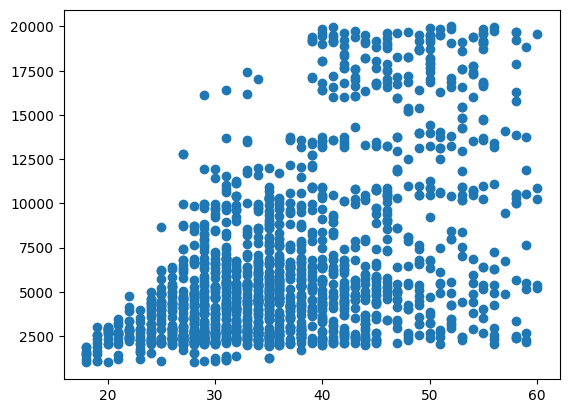

In [11]:
plt.scatter(data['Age'],data['MonthlyIncome'])
plt.show()

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.34,random_state=2)

In [13]:
reg_Model = LinearRegression()
reg_Model.fit(X_train,Y_train)

LinearRegression()

In [14]:
r2_score(Y_test, reg_Model.predict(X_test))

0.27931916636618315

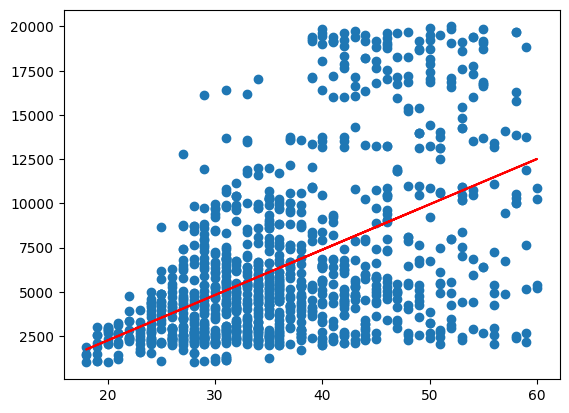

In [15]:
plt.plot(X_train,reg_Model.predict(X_train),color='r')
plt.scatter(X_train,Y_train)

In [16]:
coef = reg_Model.coef_[0]
intercept = reg_Model.intercept_

print(f'Coefficient: {coef:.2f}')
print(f'Intercept: {intercept:.2f}')

Coefficient: 256.40
Intercept: -2871.89


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

Y_train_pred = reg_Model.predict(X_train)

Y_test_pred = reg_Model.predict(X_test)

mse_train = mean_squared_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)

mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f'Training MSE: {mse_train:.2f}, R-squared: {r2_train:.2f}')
print(f'Testing MSE: {mse_test:.2f}, R-squared: {r2_test:.2f}')

Training MSE: 16639789.19, R-squared: 0.25
Testing MSE: 16263038.29, R-squared: 0.28


In [18]:
best_fit=reg_Model.intercept_+reg_Model.coef_*data['Age']
data['best']=best_fit

Text(0.5, 1.0, 'Best Fit Model')

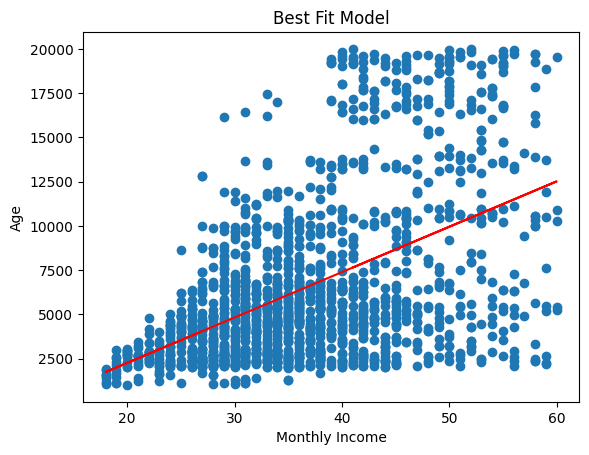

In [19]:
fig,ax=plt.subplots()
ax.scatter(x='Age',y='MonthlyIncome',data=data)
ax.plot(data['Age'],data['best'],color='red')
ax.set_ylabel('Age')
ax.set_xlabel('Monthly Income')
ax.set_title("Best Fit Model")

Evaluate the models using mean squared error values, R-squared Values and adjusted
R-squared values (wherever applicable) on the train and test dataset

In [20]:
mse_train = mean_squared_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)
adj_r2_train = 1 - (1 - r2_train) * (len(Y_train) - 1) / (len(Y_train) - X_train.shape[1] - 1)

print("Training Set Evaluation:")
print(f"MSE: {mse_train}")
print(f"R-squared: {r2_train}")
print(f"Adjusted R-squared: {adj_r2_train}")

Training Set Evaluation:
MSE: 16639789.185977757
R-squared: 0.2514930402650233
Adjusted R-squared: 0.2508150448304808


Build a Linear, Quadratic, Cubic regression models considering ‘TotalWorkingYears’
as predictor and ‘Monthly rate’ as Target Variable

1.   List item
2.   List item



In [21]:
X=data[['TotalWorkingYears']]
Y=data['MonthlyRate']

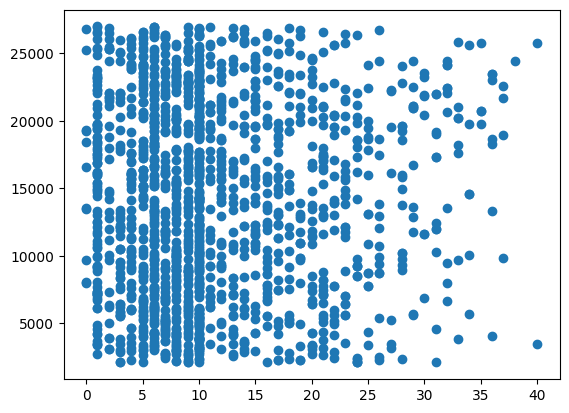

In [22]:
plt.scatter(data['TotalWorkingYears'],data['MonthlyRate'])
plt.show()

In [23]:
linear_reg = LinearRegression()
linear_reg.fit(X, Y)
linear_pred = linear_reg.predict(X)

In [24]:
quadratic_features = PolynomialFeatures(degree=2)
X_quadratic = quadratic_features.fit_transform(X)
quadratic_reg = LinearRegression()
quadratic_reg.fit(X_quadratic, Y)
quadratic_pred = quadratic_reg.predict(X_quadratic)

In [25]:
cubic_features = PolynomialFeatures(degree=3)
X_cubic = cubic_features.fit_transform(X)
cubic_reg = LinearRegression()
cubic_reg.fit(X_cubic, Y)
cubic_pred = cubic_reg.predict(X_cubic)

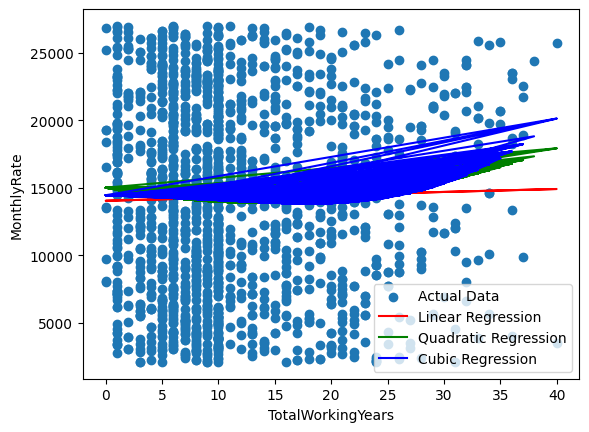

In [26]:
plt.scatter(X, Y, label='Actual Data')
plt.plot(X, linear_pred, label='Linear Regression', color='red')
plt.plot(X, quadratic_pred, label='Quadratic Regression', color='green')
plt.plot(X, cubic_pred, label='Cubic Regression', color='blue')

plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyRate')
plt.legend()
plt.show()

In [27]:
mse_linear = mean_squared_error(Y, linear_pred)
mse_quadratic = mean_squared_error(Y, quadratic_pred)
mse_cubic = mean_squared_error(Y, cubic_pred)

In [28]:
print(mse_linear)

50903846.890203364


In [29]:
print(mse_quadratic)

50694559.01698627


In [30]:
print(mse_cubic)

50642444.04029818


In [31]:
models = ['Linear', 'Quadratic', 'Cubic']
mse_values = [mse_linear, mse_quadratic, mse_cubic]

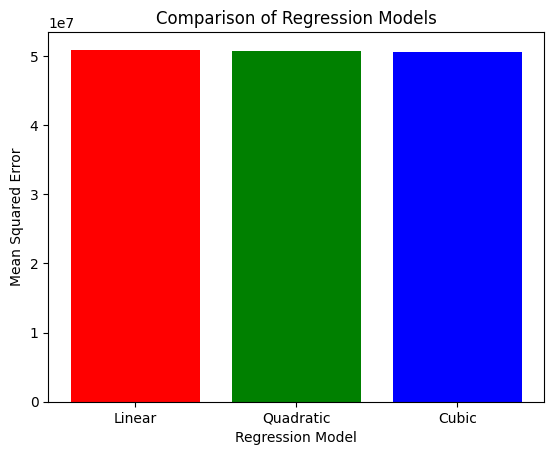

In [32]:
plt.bar(models, mse_values, color=['red', 'green', 'blue'])
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Regression Models')
plt.show()

Build a Linear, Quadratic, Cubic regression models considering ‘TotalWorkingYears’
as predictor and ‘Monthly income’ as Target Variable

In [33]:
X=data[['TotalWorkingYears']]
Y=data['MonthlyIncome']

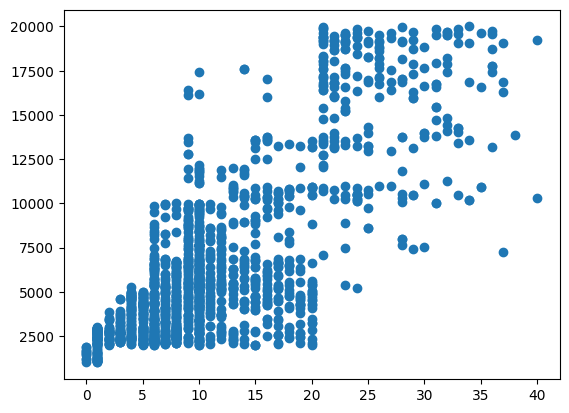

In [34]:
plt.scatter(data['TotalWorkingYears'],data['MonthlyIncome'])
plt.show()

In [35]:
linear_reg = LinearRegression()
linear_reg.fit(X, Y)
linear_pred = linear_reg.predict(X)

In [36]:
quadratic_features = PolynomialFeatures(degree=2)
X_quadratic = quadratic_features.fit_transform(X)
quadratic_reg = LinearRegression()
quadratic_reg.fit(X_quadratic, Y)
quadratic_pred = quadratic_reg.predict(X_quadratic)

In [37]:
cubic_features = PolynomialFeatures(degree=3)
X_cubic = cubic_features.fit_transform(X)
cubic_reg = LinearRegression()
cubic_reg.fit(X_cubic, Y)
cubic_pred = cubic_reg.predict(X_cubic)

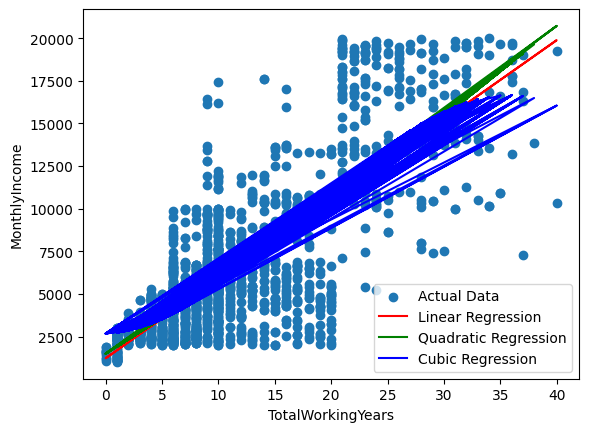

In [38]:
plt.scatter(X, Y, label='Actual Data')
plt.plot(X, linear_pred, label='Linear Regression', color='red')
plt.plot(X, quadratic_pred, label='Quadratic Regression', color='green')
plt.plot(X, cubic_pred, label='Cubic Regression', color='blue')

plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.legend()
plt.show()

In [39]:
mse_linear = mean_squared_error(Y, linear_pred)
mse_quadratic = mean_squared_error(Y, quadratic_pred)
mse_cubic = mean_squared_error(Y, cubic_pred)

In [40]:
models = ['Linear', 'Quadratic', 'Cubic']
mse_values = [mse_linear, mse_quadratic, mse_cubic]

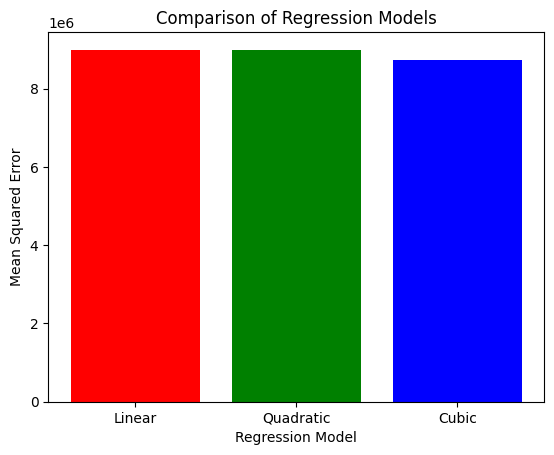

In [41]:
plt.bar(models, mse_values, color=['red', 'green', 'blue'])
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Regression Models')
plt.show()

In [42]:
print(mse_linear)

8995331.197649071


In [43]:
print(mse_quadratic)

8979124.854161749


In [44]:
print(mse_cubic)

8744876.48518599


Calculate the VIF for all the numerical valued attributes. Find a list of predictors
based on the VIF factor.

In [45]:
numerical_columns = ['StandardHours','Shift']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_data = data[numerical_cols]
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]
print(vif_data)

                    Variable        VIF
0                 EmployeeID   1.011385
1                        Age        inf
2                  DailyRate   1.020506
3           DistanceFromHome   1.016354
4                  Education   1.056573
5              EmployeeCount   0.000000
6    EnvironmentSatisfaction   1.011080
7                 HourlyRate   1.021479
8             JobInvolvement   1.024698
9                   JobLevel  11.401231
10           JobSatisfaction   1.018913
11             MonthlyIncome  11.052401
12               MonthlyRate   1.016472
13        NumCompaniesWorked   1.257702
14         PercentSalaryHike   2.453976
15         PerformanceRating   2.452678
16  RelationshipSatisfaction   1.018956
17             StandardHours   1.016083
18                     Shift   1.018535
19         TotalWorkingYears   4.799467
20     TrainingTimesLastYear   1.012426
21           WorkLifeBalance   1.014521
22            YearsAtCompany   4.544583
23        YearsInCurrentRole   2.750834


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Build a multiple regression model using the finalized set of predictors to predict the
target variable ‘Monthly rate’

In [47]:
vif_threshold = 10
selected_predictors = vif_data[vif_data["VIF"] < vif_threshold]["Variable"]
print("Selected Predictors:")
print(selected_predictors)

Selected Predictors:
0                   EmployeeID
2                    DailyRate
3             DistanceFromHome
4                    Education
5                EmployeeCount
6      EnvironmentSatisfaction
7                   HourlyRate
8               JobInvolvement
10             JobSatisfaction
12                 MonthlyRate
13          NumCompaniesWorked
14           PercentSalaryHike
15           PerformanceRating
16    RelationshipSatisfaction
17               StandardHours
18                       Shift
19           TotalWorkingYears
20       TrainingTimesLastYear
21             WorkLifeBalance
22              YearsAtCompany
23          YearsInCurrentRole
24     YearsSinceLastPromotion
25        YearsWithCurrManager
Name: Variable, dtype: object


In [48]:
final_predictors = selected_predictors.tolist()
X = sm.add_constant(data[final_predictors])
y = data['MonthlyRate']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MonthlyRate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.005e+28
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        06:04:59   Log-Likelihood:                 34661.
No. Observations:                1676   AIC:                        -6.928e+04
Df Residuals:                    1653   BIC:                        -6.915e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
EmployeeID              

In [49]:
attribute_with_highest_vif = vif_data.loc[vif_data['VIF'].idxmax()]['Variable']

In [50]:
X = data[[attribute_with_highest_vif]]
y = data['MonthlyRate']

In [51]:
for degree in range(4, 7):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred = poly_reg.predict(X_poly)

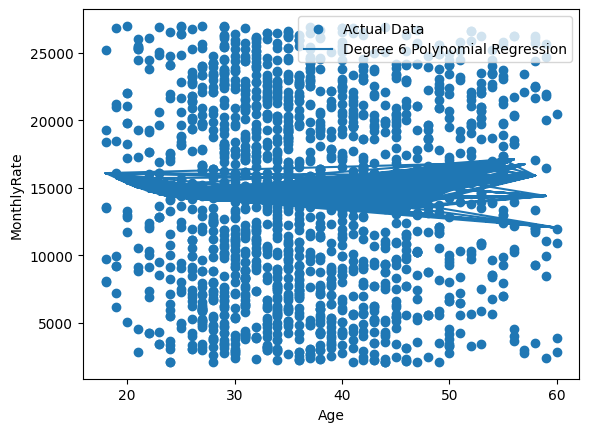

In [52]:
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, label=f'Degree {degree} Polynomial Regression')
plt.xlabel(attribute_with_highest_vif)
plt.ylabel('MonthlyRate')
plt.legend()
plt.show()

In [53]:
mse_values = []

In [54]:
for degree in range(4, 7):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred = poly_reg.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)
    print(f'Degree {degree} Polynomial Regression MSE: {mse}')

Degree 4 Polynomial Regression MSE: 50566302.06493032
Degree 5 Polynomial Regression MSE: 50316032.469324335
Degree 6 Polynomial Regression MSE: 50274254.11727274


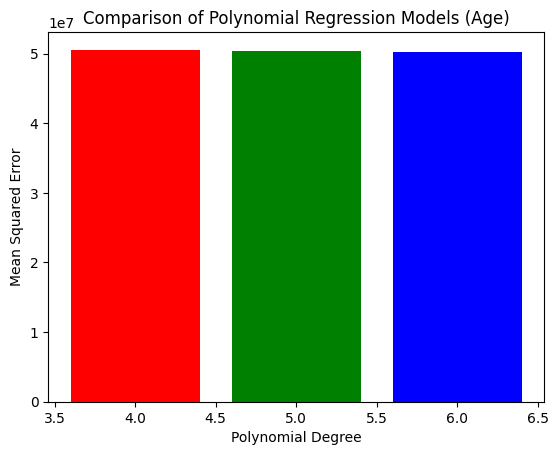

In [55]:
degrees = list(range(4, 7))
plt.bar(degrees, mse_values, color=['red', 'green', 'blue'])
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title(f'Comparison of Polynomial Regression Models ({attribute_with_highest_vif})')
plt.show()

Print intercept and coefficient values for all the models

In [56]:
for degree in range(4, 7):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)

    print(f"Polynomial Regression (Degree {degree}):")
    print(f"Intercept: {poly_reg.intercept_}")
    print(f"Coefficients: {poly_reg.coef_}")
    print("\n")

Polynomial Regression (Degree 4):
Intercept: -7355.108870988697
Coefficients: [ 0.00000000e+00  2.81611782e+03 -1.24458934e+02  2.23843500e+00
 -1.39502209e-02]


Polynomial Regression (Degree 5):
Intercept: 241117.8961995889
Coefficients: [ 0.00000000e+00 -3.38903494e+04  1.96476312e+03 -5.51681771e+01
  7.49429754e-01 -3.94011112e-03]


Polynomial Regression (Degree 6):
Intercept: -103947.86083508877
Coefficients: [ 0.00000000e+00  2.76270203e+04 -2.46106506e+03  1.09579574e+02
 -2.60286767e+00  3.14766866e-02 -1.52050892e-04]




Build a Ridge regression model using the attribute that has highest VIF for 50
different values of alpha ranging from 0.01 to 100. Target variable is ‘Monthly rate’.

Build a LASSO regression model using the attribute that has highest VIF for 25
different values of alpha ranging from 0.01 to 100. Target variable is ‘Monthly rate’.
List the attributes eliminated by LASSO regression Model, if applicable.

In [57]:
X = data[[attribute_with_highest_vif]]
y = data['MonthlyRate']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
alphas_ridge = (0.1,0.5,0.7,0.9,1,3,5,7,9,10,12,15,17,19,20,22,25,27,30,32,35,37,40,42,45,47,49,50,52,55,57,60,62,65,67,70,72,75,77,79,80,82,85,87,90,92,95,97,99,100)
ridge_mse_values = []

for alpha in alphas_ridge:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_scaled, y)
    y_pred_ridge = ridge_model.predict(X_scaled)
    mse_ridge = mean_squared_error(y, y_pred_ridge)
    ridge_mse_values.append(mse_ridge)

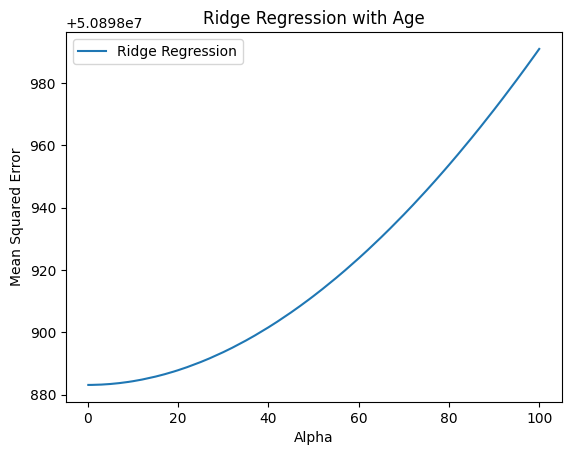

In [59]:
plt.plot(alphas_ridge, ridge_mse_values, label='Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title(f'Ridge Regression with {attribute_with_highest_vif}')
plt.legend()
plt.show()

In [60]:
from sklearn.linear_model import Lasso
alphas_lasso = (0.1,0.5,1,5,10,12,15,20,22,25,30,40,42,45,50,52,55,60,62,70,72,80,87,90,95,100)
lasso_mse_values = []

lasso_coefs = []

In [61]:
for alpha in alphas_lasso:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_scaled, y)
    y_pred_lasso = lasso_model.predict(X_scaled)
    mse_lasso = mean_squared_error(y, y_pred_lasso)
    lasso_mse_values.append(mse_lasso)
    lasso_coefs.append(lasso_model.coef_)

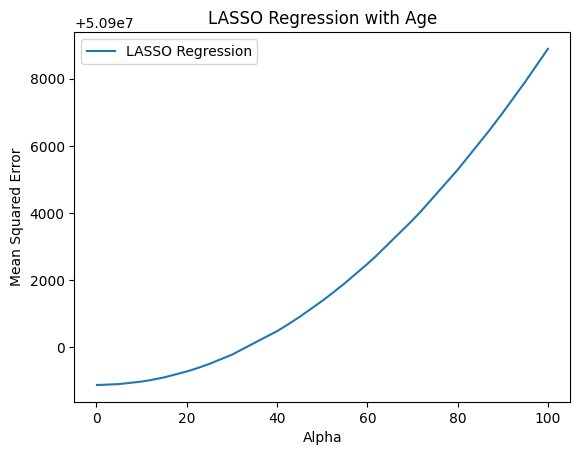

In [62]:
plt.plot(alphas_lasso, lasso_mse_values, label='LASSO Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title(f'LASSO Regression with {attribute_with_highest_vif}')
plt.legend()
plt.show()

In [63]:
lasso_coefs = np.array(lasso_coefs)
eliminated_attributes = X.columns[lasso_coefs.sum(axis=0) == 0]

In [64]:
print(f'Attributes eliminated by LASSO regression: {eliminated_attributes}')

Attributes eliminated by LASSO regression: Index([], dtype='object')


Identify the predictors based on the VIF that will be useful for predicting
‘PercentSalaryHike’. Comment on the predictors identified by you.

In [65]:
X = data[selected_predictors]
y = data['PercentSalaryHike']

In [66]:
X = sm.add_constant(X)

In [67]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      PercentSalaryHike   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.207e+29
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        06:05:15   Log-Likelihood:                 49322.
No. Observations:                1676   AIC:                        -9.860e+04
Df Residuals:                    1653   BIC:                        -9.847e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
EmployeeID              